In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
import seaborn as sns
from collections import Counter


In [29]:
missingValues = ["n/a", "na", " ", "__"]
data = pd.read_csv("/Users/aniketsingh/Desktop/music/musicdataPop.csv", na_values = missingValues)
data

,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness,explicit,duration_ms,popularity,year
0,0.630,0.372,0.410,92.034,-10.917,1,9,0.42200,0.004170,0.2830,0.0331,0,146093,19,1966
1,0.425,0.760,0.802,146.207,-10.094,1,2,0.00167,0.014700,0.3150,0.0322,0,135827,20,1965
2,0.659,0.573,0.827,96.254,-10.183,1,2,0.14100,0.000097,0.0779,0.0336,0,131480,17,1966
3,0.588,0.709,0.877,135.511,-9.87,1,0,0.26500,0.000000,0.1940,0.0300,0,115200,15,1965
4,0.657,0.872,0.738,136.512,-7.279,1,2,0.11100,0.713000,0.0857,0.0512,0,166693,17,1966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89587,0.276,0.892,0.715,80.475,-7.035,1,11,0.40900,0.000000,0.7140,0.0893,0,115973,33,1975
89588,0.700,0.592,0.906,109.847,-10.434,1,11,0.10800,0.018400,0.1180,0.0681,0,263627,32,1976
89589,0.709,0.709,0.863,111.544,-12.023,1,2,0.11800,0.000011,0.1250,0.0370,0,158400,31,1987
89590,0.552,0.651,0.533,161.548,-10.624,0,4,0.00494,0.034900,0.1320,0.2290,0,232533,43,1992


In [34]:
data.groupby(by='year').size()
data = data.groupby(by='year').mean()
data

,danceability,energy,valence,tempo,mode,key,acousticness,instrumentalness,liveness,speechiness,explicit,duration_ms,popularity
year,,,,,,,,,,,,,
1921,0.375500,0.189100,0.497000,143.028500,1.000000,3.000000,0.992500,0.348850,0.392500,0.040650,0.000000,234687.000000,0.000000
1924,0.564500,0.258950,0.615500,115.096500,0.000000,4.500000,0.971500,0.012603,0.148500,0.055600,0.000000,190633.500000,0.000000
1925,0.517000,0.261267,0.680000,123.948333,1.000000,3.333333,0.961333,0.062858,0.540667,0.209700,0.000000,190813.333333,11.000000
1926,0.502500,0.264200,0.570500,122.340000,1.000000,8.000000,0.951500,0.405550,0.119300,0.051550,0.000000,182306.500000,3.000000
1927,0.556400,0.298500,0.577900,96.532100,0.600000,5.800000,0.919000,0.078115,0.190600,0.121870,0.000000,177153.600000,2.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,0.574032,0.621266,0.447581,118.607529,0.635496,5.381679,0.260617,0.030065,0.176144,0.084864,0.229008,229262.791985,62.519084
2017,0.619486,0.607507,0.460295,119.977034,0.615711,5.314225,0.264972,0.022577,0.172620,0.083612,0.212314,222495.585987,66.494692
2018,0.619472,0.635531,0.445412,119.005425,0.648241,5.291457,0.235988,0.012721,0.168838,0.088843,0.271357,214676.025126,68.344221


In [35]:
data.reset_index()

,year,danceability,energy,valence,tempo,mode,key,acousticness,instrumentalness,liveness,speechiness,explicit,duration_ms,popularity
0,1921,0.375500,0.189100,0.497000,143.028500,1.000000,3.000000,0.992500,0.348850,0.392500,0.040650,0.000000,234687.000000,0.000000
1,1924,0.564500,0.258950,0.615500,115.096500,0.000000,4.500000,0.971500,0.012603,0.148500,0.055600,0.000000,190633.500000,0.000000
2,1925,0.517000,0.261267,0.680000,123.948333,1.000000,3.333333,0.961333,0.062858,0.540667,0.209700,0.000000,190813.333333,11.000000
3,1926,0.502500,0.264200,0.570500,122.340000,1.000000,8.000000,0.951500,0.405550,0.119300,0.051550,0.000000,182306.500000,3.000000
4,1927,0.556400,0.298500,0.577900,96.532100,0.600000,5.800000,0.919000,0.078115,0.190600,0.121870,0.000000,177153.600000,2.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,2016,0.574032,0.621266,0.447581,118.607529,0.635496,5.381679,0.260617,0.030065,0.176144,0.084864,0.229008,229262.791985,62.519084
94,2017,0.619486,0.607507,0.460295,119.977034,0.615711,5.314225,0.264972,0.022577,0.172620,0.083612,0.212314,222495.585987,66.494692
95,2018,0.619472,0.635531,0.445412,119.005425,0.648241,5.291457,0.235988,0.012721,0.168838,0.088843,0.271357,214676.025126,68.344221
96,2019,0.632674,0.620615,0.490432,117.348751,0.652278,5.304556,0.254599,0.029538,0.171290,0.091350,0.220624,217420.378897,71.539568


In [36]:
data.columns

Index(['danceability', 'energy', 'valence', 'tempo', 'mode', 'key',
       'acousticness', 'instrumentalness', 'liveness', 'speechiness',
       'explicit', 'duration_ms', 'popularity'],
      dtype='object')

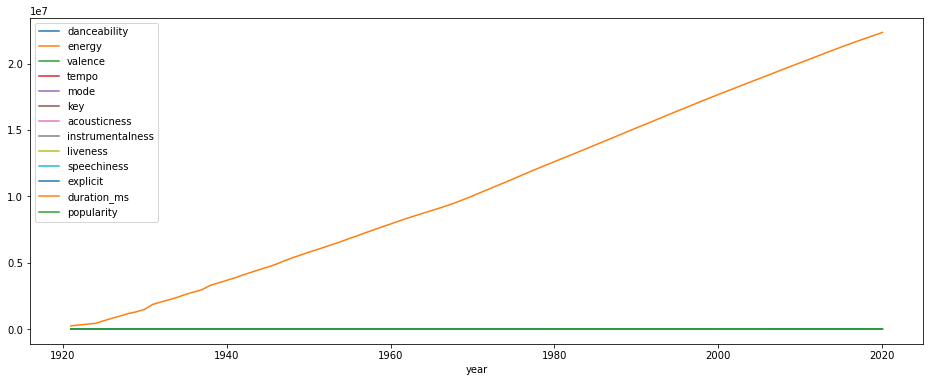

In [37]:
#--------Unormalized----------#
fig, ax = plt.subplots(figsize=(16, 6))
df = data.cumsum()
for col in df.columns:
    df[col] = df[col].astype('float64')    
    df.plot(y=col, use_index=True, ax=ax)
plt.show()

In [43]:

# --------- Normalized-------#
scaler = MinMaxScaler()
data_norm = data.copy()
data_norm[:] = scaler.fit_transform(data_norm)
data_norm.head(1)

df = pd.DataFrame(data)
selected_columns = df[["danceability","energy", "valence", "tempo", "mode", "key","popularity"]]

selected_columns2 = df[["acousticness","instrumentalness",	"liveness"	,"speechiness",	"explicit",	"duration_ms"]]

new_df = selected_columns.copy()
new_df2 = selected_columns2.copy()
new_df[:] = scaler.fit_transform(new_df)
new_df2[:] = scaler.fit_transform(new_df2)



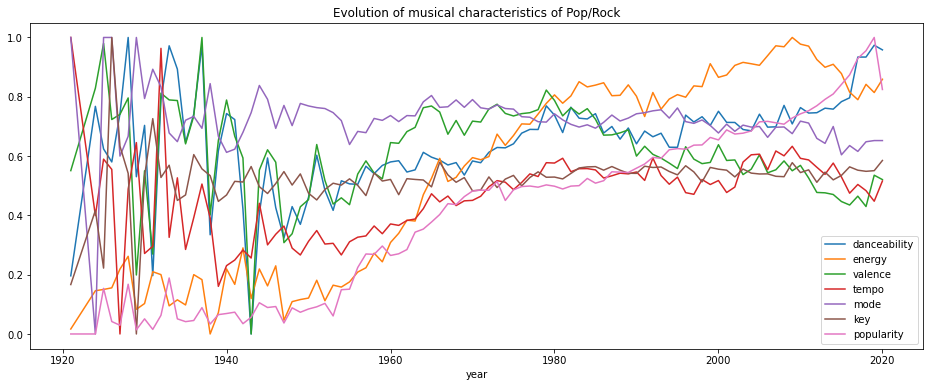

In [44]:
# Plot each feature (normalized) vs time
fig, ax = plt.subplots(figsize=(16, 6))
import matplotlib.colors as mcolors


for col in new_df.columns:
    new_df[col] = new_df[col].astype('float64')    
    new_df.plot(y=col, use_index=True,kind = "line", stacked= False,   ax=ax)
plt.title("Evolution of musical characteristics of Pop/Rock")
plt.show()

In [45]:
df = pd.DataFrame(data)
selected_columns = df[["danceability","energy", "valence", "tempo", "mode", "key","popularity"]]

selected_columns2 = df[["acousticness","instrumentalness",	"liveness"	,"speechiness",	"explicit",	"duration_ms"]]

new_df = selected_columns.copy()
new_df2 = selected_columns2.copy()
new_df[:] = scaler.fit_transform(new_df)
new_df2[:] = scaler.fit_transform(new_df2)


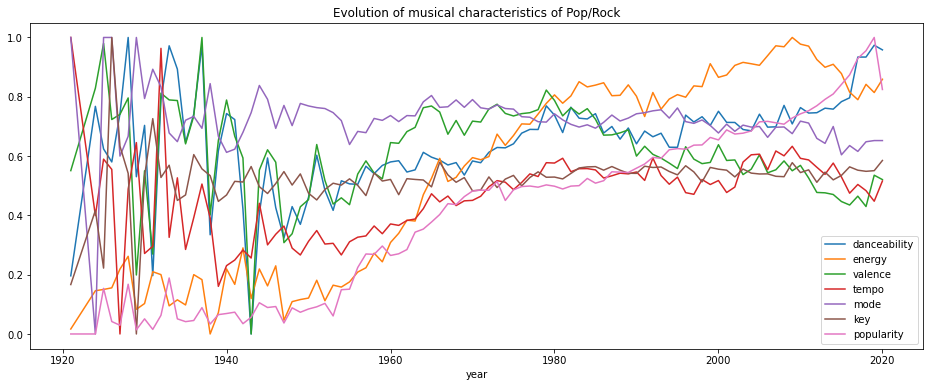

In [46]:
# Plot each feature (normalized) vs time
fig, ax = plt.subplots(figsize=(16, 6))
import matplotlib.colors as mcolors


for col in new_df.columns:
    new_df[col] = new_df[col].astype('float64')    
    new_df.plot(y=col, use_index=True,kind = "line", stacked= False,   ax=ax)
plt.title("Evolution of musical characteristics of Pop/Rock")
plt.show()

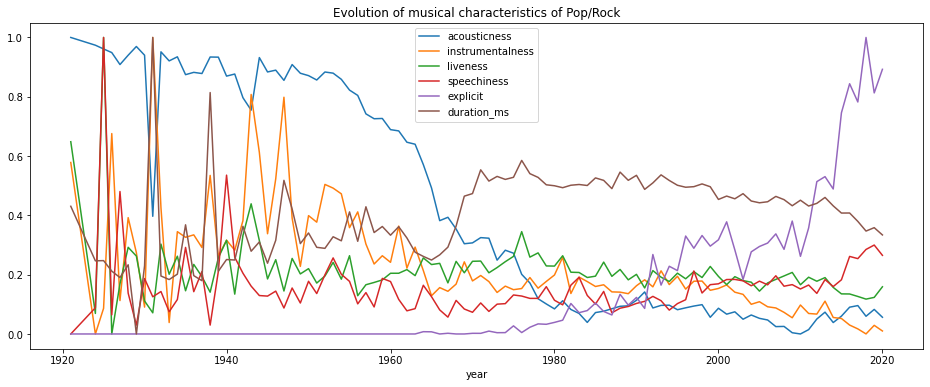

In [47]:
fig, ax = plt.subplots(figsize=(16, 6))
for col in new_df2.columns:
    new_df2[col] = new_df2[col].astype('float64')    
    new_df2.plot(y=col, use_index=True,kind = "line", stacked = False,  ax=ax)
plt.title("Evolution of musical characteristics of Pop/Rock")
plt.show()